In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

# modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# splitting data and model evaluation
from sklearn.metrics import recall_score, f1_score, roc_auc_score, make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# cross-validation and hyperparameter tuning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [5]:
# read data
df = pd.read_csv('Downloads/Customer-Churn-Records.csv', encoding='utf-8')

# print shape of data
print('Number of instances : ', df.shape[0])
print('Number of features : ', df.shape[1])

df.head(5)

Number of instances :  10000
Number of features :  18


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
df.shape

(10000, 18)

In [8]:
# initialize category and numeric data
category = [i for i in df.columns if df[i].dtype == 'object']
numerical = [i for i in df.columns if df[i].dtype != 'object']

In [9]:
# show statistical summary of numeric data
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [10]:
# show statistical summary of category data
df[category].describe().T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Card Type,10000,4,DIAMOND,2507


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [13]:
# drop columns
df.drop(['RowNumber', 'Surname'], axis=1, inplace=True)
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')

In [14]:
print(df.Exited.value_counts())

0    7962
1    2038
Name: Exited, dtype: int64


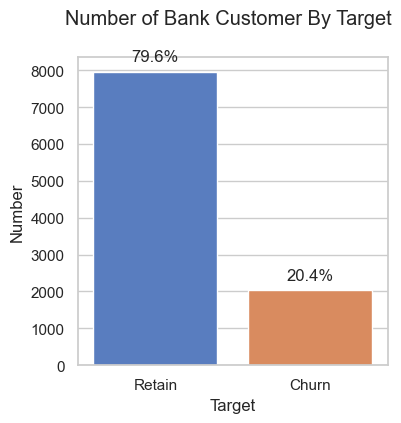

In [15]:
sns.set_theme(style="whitegrid")

chart = 'Number of Bank Customer By Target'

plt.figure(figsize=(4, 4))
plt.suptitle(f'{chart}', y=1)

# plotting countplot based on the target variable
g = sns.countplot(x='Exited', data=df, palette='muted')
g.set(ylabel='Number', xlabel='Target')

# # customize xticks
plt.xticks([0, 1], ['Retain', 'Churn'], fontsize=11)

# annotate the percentage on the chart
total = len(df['Exited'])
for p in g.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 200), \
                            ha='center', va='bottom', fontsize=12)

plt.show()

# Encoding

In [16]:
# identify categorical columns in the DataFrame
category = [i for i in df.columns if df[i].dtype == 'object']

# iterate over each categorical column
for col in category:
    # print the value counts for the current column
    print(df[col].value_counts())
    print()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64



In [17]:
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

# define a function to encode category data into numeric
def encode_data(data, columns, method):
    if method == 'ordinal':
        ordinal_enc = OrdinalEncoder()
        encoded_columns = ordinal_enc.fit_transform(data[columns])
        data[columns] = encoded_columns
        data[columns] = encoded_columns.astype(int)
       
   
    return data

df1 = df.copy()

ordinal_columns = ['Geography', 'Gender', 'Card Type']

# apply the 'encode_data' function to 'ordinal_columns'
df1 = encode_data(df1, ordinal_columns, method='ordinal')

df1

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,0,300
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0,5,2,771
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,3,564
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,1,339


# Correlation

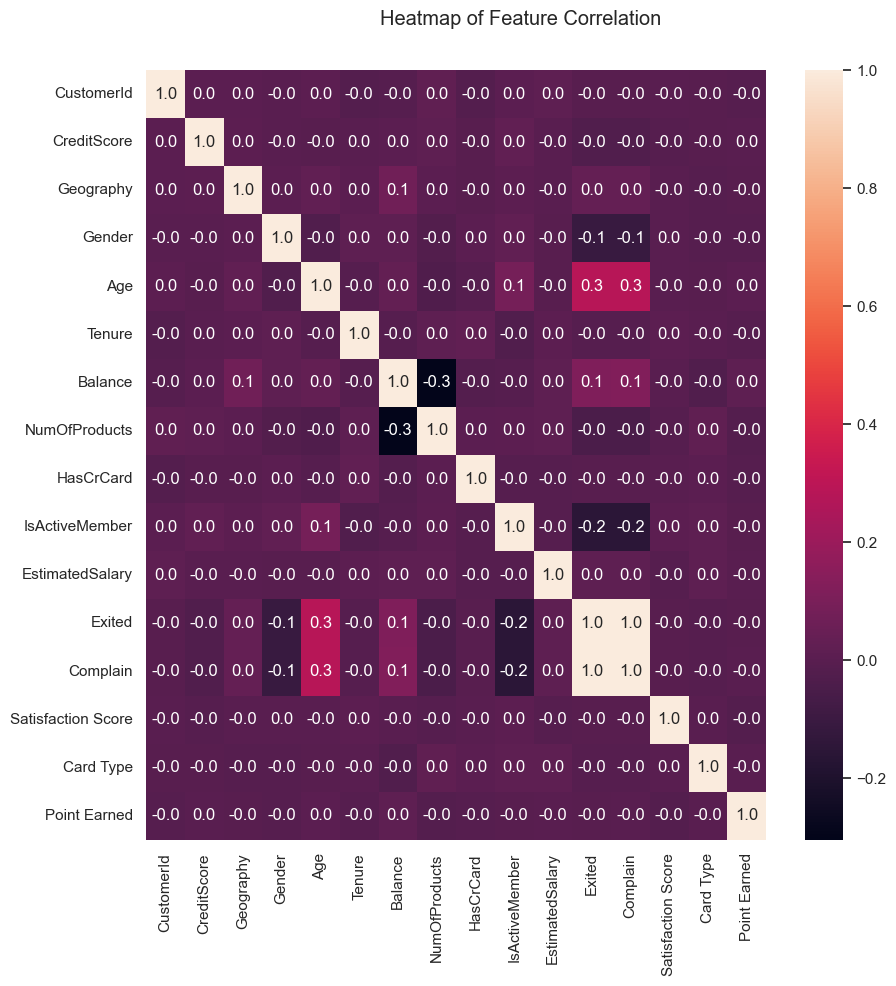

In [18]:
chart = 'Heatmap of Feature Correlation'

plt.figure(figsize=(10, 10))
plt.suptitle(f'{chart}', y=0.94)

# plot a heatmap of feature correlation
sns.heatmap(df1.corr(), annot=True, fmt='.1f')
plt.show()

# MODELING

In [19]:
sns.set_theme(style="white")

# initialize X as features and y as target
X = df1.drop(['Exited'], axis=1).values
y = df1['Exited'].values

# split the data into train and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [20]:
df1['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [21]:
def plot_cm(cm, chart):

    # set figure size and title
    plt.figure(figsize=(6, 5))
    plt.suptitle(f'Confusion Matrix of {chart}', y=1)

    # initialize TP, TN, FN, and FP counts
    group_names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
    group_initial = ['(TN)','(FN)','(FP)','(TP)']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    # create label strings with counts and percentages
    labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # plot heatmap of the confusion matrix
    g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    g.set_xlabel('Actual')
    g.set_ylabel('Predicted')
    
    plt.show()

# Naive Bayes

In [22]:
# initialize the Naive Bayes classifier and fit it to the training data
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

# make predictions on the test data
y_pred = NB_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Recall       :", recall)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Recall       : 0.07692307692307693
ROC-AUC Score: 0.5284154940915091
Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.98      0.88      2389
           1       0.49      0.08      0.13       611

    accuracy                           0.80      3000
   macro avg       0.65      0.53      0.51      3000
weighted avg       0.74      0.80      0.73      3000

Confusion Matrix:

 [[2341   48]
 [ 564   47]]


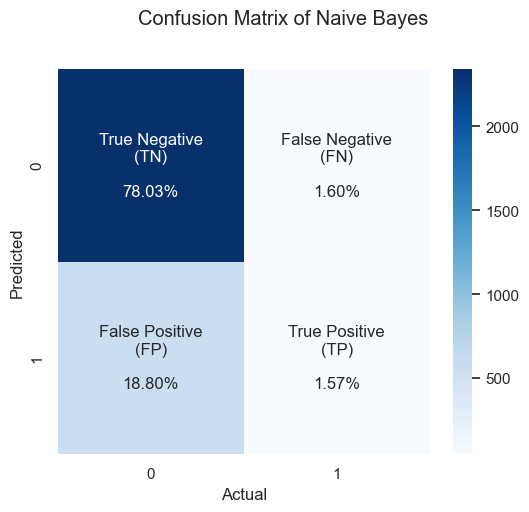

In [23]:
chart = 'Naive Bayes'

# plot the confusion matrix
plot_cm(cm, chart)

# Cross-Validation

In [24]:
# initialize a K-Fold cross-validation object with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# compute the cross-validation recall scores and ROC-AUC scores for the untuned NB classifier
nb_before_tuned_cv_recall_scores = cross_val_score(NB_classifier, X_train, y_train, 
                                            cv=kf, n_jobs=-1, scoring='recall').mean()
nb_before_tuned_cv_rocauc_scores = cross_val_score(NB_classifier, X_train, y_train, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation recall and ROC-AUC score for untuned {chart} after a 10 fold cross validation:")
print("Recall   :", nb_before_tuned_cv_recall_scores)
print("ROC-AUC  :", nb_before_tuned_cv_rocauc_scores)

The cross-validation recall and ROC-AUC score for untuned Naive Bayes after a 10 fold cross validation:
Recall   : 0.07208737784782657
ROC-AUC  : 0.7878144389542039


# Hyperparameter Tuning

In [25]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# initialize GridSearchCV objects for recall and ROC-AUC score
grid_nb_recall = GridSearchCV(NB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='recall')
grid_nb_rocauc = GridSearchCV(NB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for recall and ROC-AUC score
grid_nb_recall.fit(X_train, y_train)
grid_nb_rocauc.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='roc_auc')

In [27]:
best_hyperparams_recall = grid_nb_recall.best_params_
best_hyperparams_rocauc = grid_nb_rocauc.best_params_

print("Best hyperparameters for recall and ROC-AUC:")
print("Recall   :\n", best_hyperparams_recall)
print("ROC-AUC  :\n", best_hyperparams_rocauc)

nb_after_tuned_cv_recall_scores = grid_nb_recall.best_score_
nb_after_tuned_cv_rocauc_scores = grid_nb_rocauc.best_score_

print(f"\nThe cross-validation recall and ROC-AUC score for tuned {chart} after a 10 fold cross validation:")
print("Recall   :", nb_after_tuned_cv_recall_scores)
print("ROC-AUC  :", nb_after_tuned_cv_rocauc_scores)

best_nb_model = grid_nb_recall.best_estimator_


Best hyperparameters for recall and ROC-AUC:
Recall   :
 {'var_smoothing': 1e-09}
ROC-AUC  :
 {'var_smoothing': 1e-09}

The cross-validation recall and ROC-AUC score for tuned Naive Bayes after a 10 fold cross validation:
Recall   : 0.07208737784782657
ROC-AUC  : 0.7878144389542039


In [24]:
best_nb_fit_for_train_data_recall = cross_val_score(best_nb_model, X_train, y_train,
                                             cv=kf, n_jobs=-1, scoring='recall').mean()

best_nb_fit_for_train_data_rocauc = cross_val_score(best_nb_model, X_train, y_train,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Recall   :", best_nb_fit_for_train_data_recall)
print("ROC-AUC  :", best_nb_fit_for_train_data_rocauc)

best_nb_fit_for_test_data_recall = cross_val_score(best_nb_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_nb_fit_for_test_data_rocauc = cross_val_score(best_nb_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Recall   :", best_nb_fit_for_test_data_recall)
print("ROC-AUC  :", best_nb_fit_for_test_data_rocauc)

Train Data
Recall   : 0.07208737784782657
ROC-AUC  : 0.7878144389542039
Test Data
Recall   : 0.7976666666666666
ROC-AUC  : 0.8027738366098832


# Decision Tree

In [25]:
# initialize the Naive Bayes classifier and fit it to the training data
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train)

# make predictions on the test data
y_pred = DT_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Recall       :", recall)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Recall       : 0.9869067103109657
ROC-AUC Score: 0.9928254773823559
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2389
           1       1.00      0.99      0.99       611

    accuracy                           1.00      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000

Confusion Matrix:

 [[2386    3]
 [   8  603]]


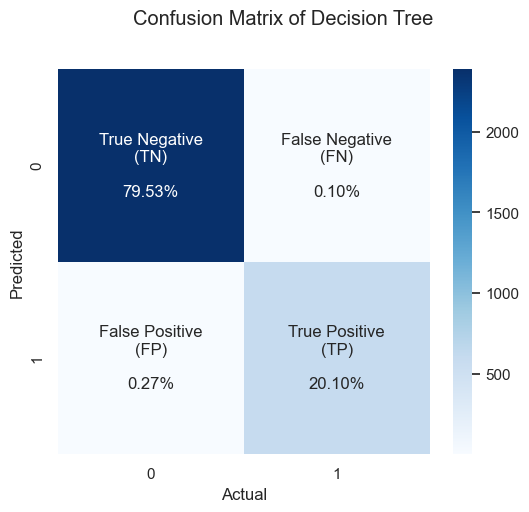

In [26]:
chart = 'Decision Tree'

# plot the confusion matrix
plot_cm(cm, chart)

# Cross-Validation

In [28]:
# compute the cross-validation recall scores and ROC-AUC scores for the untuned DT classifier
dt_before_tuned_cv_recall_scores = cross_val_score(DT_classifier, X_train, y_train, 
                                            cv=kf, n_jobs=-1, scoring='recall').mean()
dt_before_tuned_cv_rocauc_scores = cross_val_score(DT_classifier, X_train, y_train, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation recall and ROC-AUC score for untuned {chart} after a 10 fold cross validation:")
print("Recall   :", dt_before_tuned_cv_recall_scores)
print("ROC-AUC  :", dt_before_tuned_cv_rocauc_scores)

The cross-validation recall and ROC-AUC score for untuned Decision Tree after a 10 fold cross validation:
Recall   : 0.9881795730646974
ROC-AUC  : 0.9952335773808084


# Hyperparameter Tuning

In [29]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# initialize GridSearchCV objects for recall and ROC-AUC score
grid_dt_recall = GridSearchCV(DT_classifier, param_grid, cv=kf, n_jobs=-1, scoring='recall')
grid_dt_rocauc = GridSearchCV(DT_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for recall and ROC-AUC score
grid_dt_recall.fit(X_train, y_train)
grid_dt_rocauc.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [30]:
best_hyperparams_recall = grid_dt_recall.best_params_
best_hyperparams_rocauc = grid_dt_rocauc.best_params_

print("Best hyperparameters for recall and ROC-AUC:")
print("Recall :\n", best_hyperparams_recall)
print("ROC-AUC  :\n", best_hyperparams_rocauc)

dt_after_tuned_cv_recall_scores = grid_dt_recall.best_score_
dt_after_tuned_cv_rocauc_scores = grid_dt_rocauc.best_score_

print(f"\nThe cross-validation recall and ROC-AUC score for tuned {chart} after a 10 fold cross validation:")
print("Recall :", dt_after_tuned_cv_recall_scores)
print("ROC-AUC  :", dt_after_tuned_cv_rocauc_scores)

best_dt_model = grid_dt_recall.best_estimator_

Best hyperparameters for recall and ROC-AUC:
Recall :
 {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
ROC-AUC  :
 {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

The cross-validation recall and ROC-AUC score for tuned Decision Tree after a 10 fold cross validation:
Recall : 0.9979128014842301
ROC-AUC  : 0.9985739756415228


In [31]:
best_dt_fit_for_train_data_recall = cross_val_score(best_dt_model, X_train, y_train,
                                             cv=kf, n_jobs=-1, scoring='recall').mean()

best_dt_fit_for_train_data_rocauc = cross_val_score(best_dt_model, X_train, y_train,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Recall   :", best_dt_fit_for_train_data_recall)
print("ROC-AUC  :", best_dt_fit_for_train_data_rocauc)

best_dt_fit_for_test_data_recall = cross_val_score(best_dt_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_dt_fit_for_test_data_rocauc = cross_val_score(best_dt_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Recall   :", best_dt_fit_for_test_data_recall)
print("ROC-AUC  :", best_dt_fit_for_test_data_rocauc)

Train Data
Recall   : 0.9979128014842301
ROC-AUC  : 0.9979404351794459
Test Data
Recall   : 0.9979999999999999
ROC-AUC  : 0.9980326716406693


# AdaBoost

In [32]:
# initialize the Logistic Regression classifier and fit it to the training data
ADA_classifier = AdaBoostClassifier()
ADA_classifier.fit(X_train, y_train)

# make predictions on the test data
y_pred = ADA_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Recall       :", recall)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Recall       : 0.9967266775777414
ROC-AUC Score: 0.9979447536067861
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2389
           1       1.00      1.00      1.00       611

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Confusion Matrix:

 [[2387    2]
 [   2  609]]


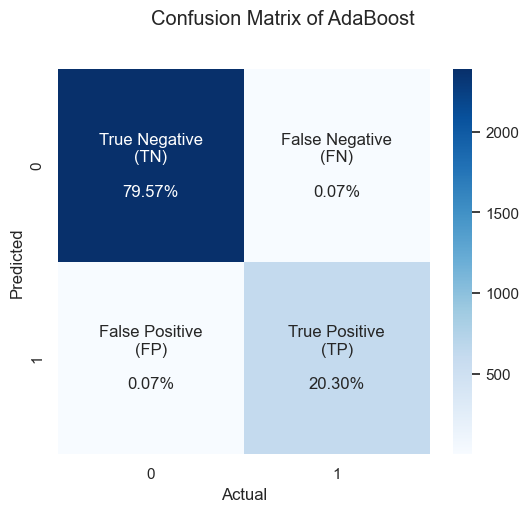

In [33]:
chart = 'AdaBoost'

# plot the confusion matrix
plot_cm(cm, chart)

In [34]:
# compute the cross-validation recall scores and ROC-AUC scores for the untuned ADA classifier
ada_before_tuned_cv_recall_scores = cross_val_score(ADA_classifier, X_train, y_train, 
                                            cv=kf, n_jobs=-1, scoring='recall').mean()
ada_before_tuned_cv_rocauc_scores = cross_val_score(ADA_classifier, X_train, y_train, 
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation recall and ROC-AUC score for untuned {chart} after a 10 fold cross validation:")
print("Recall   :", ada_before_tuned_cv_recall_scores)
print("ROC-AUC  :", ada_before_tuned_cv_rocauc_scores)

The cross-validation recall and ROC-AUC score for untuned AdaBoost after a 10 fold cross validation:
Recall   : 0.9985930735930737
ROC-AUC  : 0.9996058901495051


# Hyperparameter Tuning

In [35]:
param_grid = {
    'n_estimators': [100, 300, 500, 600],
    'learning_rate': [0.01, 0.08, 0.1, 0.5, 1.0]
}

# initialize GridSearchCV objects for recall and ROC-AUC score
grid_ada_recall = GridSearchCV(ADA_classifier, param_grid, cv=kf, n_jobs=-1, scoring='recall')
grid_ada_rocauc = GridSearchCV(ADA_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for recall and ROC-AUC score
grid_ada_recall.fit(X_train, y_train)
grid_ada_rocauc.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.08, 0.1, 0.5, 1.0],
                         'n_estimators': [100, 300, 500, 600]},
             scoring='roc_auc')

In [36]:
best_hyperparams_recall = grid_ada_recall.best_params_
best_hyperparams_rocauc = grid_ada_rocauc.best_params_

print("Best hyperparameters for recall and ROC-AUC:")
print("Recall :\n", best_hyperparams_recall)
print("ROC-AUC  :\n", best_hyperparams_rocauc)

ada_after_tuned_cv_recall_scores = grid_ada_recall.best_score_
ada_after_tuned_cv_rocauc_scores = grid_ada_rocauc.best_score_

print(f"\nThe cross-validation recall and ROC-AUC score for tuned {chart} after a 10 fold cross validation:")
print("Recall :", ada_after_tuned_cv_recall_scores)
print("ROC-AUC  :", ada_after_tuned_cv_rocauc_scores)

best_ada_model = grid_ada_recall.best_estimator_

Best hyperparameters for recall and ROC-AUC:
Recall :
 {'learning_rate': 0.01, 'n_estimators': 100}
ROC-AUC  :
 {'learning_rate': 0.01, 'n_estimators': 500}

The cross-validation recall and ROC-AUC score for tuned AdaBoost after a 10 fold cross validation:
Recall : 0.9985930735930737
ROC-AUC  : 0.9995296695696764


In [37]:
best_ada_fit_for_train_data_recall = cross_val_score(best_ada_model, X_train, y_train,
                                             cv=kf, n_jobs=-1, scoring='recall').mean()

best_ada_fit_for_train_data_rocauc = cross_val_score(best_ada_model, X_train, y_train,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Recall   :", best_ada_fit_for_train_data_recall)
print("ROC-AUC  :", best_ada_fit_for_train_data_rocauc)

best_ada_fit_for_test_data_recall = cross_val_score(best_ada_model, X_test, y_test, 
                                            cv=kf, n_jobs=-1).mean()
best_ada_fit_for_test_data_rocauc = cross_val_score(best_ada_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Recall   :", best_ada_fit_for_test_data_recall)
print("ROC-AUC  :", best_ada_fit_for_test_data_rocauc)

Train Data
Recall   : 0.9985930735930737
ROC-AUC  : 0.9985810962178148
Test Data
Recall   : 0.9986666666666666
ROC-AUC  : 0.9980326716406693


# EVALUATION

# Model Selection

In [38]:
dict_result = {'Model' :['Naive Bayes', 'Decision Tree', 'AdaBoost'],
                "Recall (train)": [best_nb_fit_for_train_data_recall, best_dt_fit_for_train_data_recall, best_ada_fit_for_train_data_recall],
                "Recall (test)": [best_nb_fit_for_test_data_recall, best_dt_fit_for_test_data_recall, best_ada_fit_for_test_data_recall],
                "ROC-AUC (train)": [best_nb_fit_for_train_data_rocauc, best_dt_fit_for_train_data_rocauc, best_ada_fit_for_train_data_rocauc],
                "ROC-AUC (test)": [best_nb_fit_for_test_data_rocauc, best_dt_fit_for_test_data_rocauc, best_ada_fit_for_test_data_rocauc]}

model_result = pd.DataFrame(dict_result).sort_values(by=['Recall (test)'], ascending= False).reset_index(drop=True)
model_result

,Model,Recall (train),Recall (test),ROC-AUC (train),ROC-AUC (test)
0,AdaBoost,0.998593,0.998667,0.998581,0.998033
1,Decision Tree,0.997913,0.998000,0.997940,0.998033
2,Naive Bayes,0.072087,0.797667,0.787814,0.802774


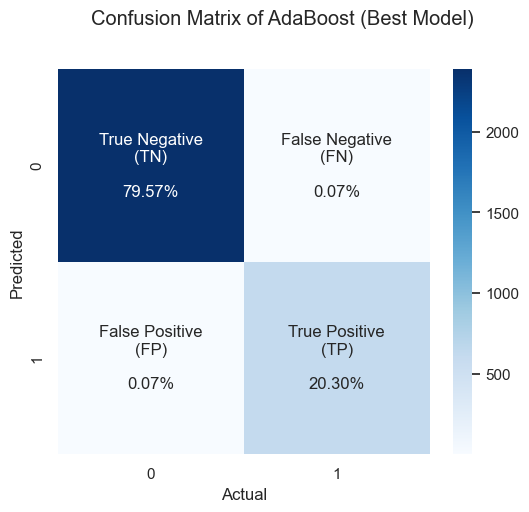

In [39]:
chart = 'AdaBoost (Best Model)'

cm = confusion_matrix(y_test, best_ada_model.predict(X_test))

plot_cm(cm, chart)

# ROC-AUC Curve

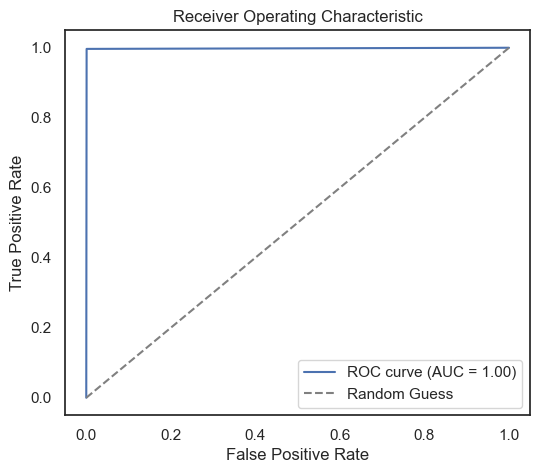

In [40]:
from sklearn.metrics import roc_curve, auc

y_prob = best_ada_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Prediction

In [44]:
# create a dataframe to store the predictions and concatenate the predictions with the original train dataframe
predictions = pd.DataFrame({'Prediction': best_ada_model.predict(df1.drop('Exited', axis=1))})
result = pd.concat([predictions, df1], axis=1).rename(columns={'Exited': 'Actual', 'Prediction': 'Predicted'})

# select the desired columns for the result DataFrame
columns = ['Actual', 'Predicted', 'CustomerId', 'Gender', 'Age', 'Geography', 'Tenure', 'CreditScore', 'Balance', 'NumOfProducts',
           'HasCrCard', 'Card Type', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']
result = result[columns]

# map the numerical labels to their corresponding Churn status
result['Exited (Actual)'] = result['Actual'].map({1: 'Churn', 0: 'Retain'})
result['Exited (Predicted)'] = result['Predicted'].map({1: 'Churn', 0: 'Retain'})

result.tail()

,Actual,Predicted,CustomerId,Gender,Age,Geography,Tenure,CreditScore,Balance,NumOfProducts,HasCrCard,Card Type,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Exited (Actual),Exited (Predicted)
9995,0,0,15606229,1,39,0,5,771,0.00,2,1,0,0,96270.64,0,1,300,Retain,Retain
9996,0,0,15569892,1,35,0,10,516,57369.61,1,1,2,1,101699.77,0,5,771,Retain,Retain
9997,1,1,15584532,0,36,0,7,709,0.00,1,0,3,1,42085.58,1,3,564,Churn,Churn
9998,1,1,15682355,1,42,1,3,772,75075.31,2,1,1,0,92888.52,1,2,339,Churn,Churn
9999,0,0,15628319,0,28,0,4,792,130142.79,1,1,0,0,38190.78,0,3,911,Retain,Retain


# Result

The most suitable model evaluation metrics in this case are recall and ROC-AUC, using recall because it needs to take into account the percentage of False Negative (FN) that must be minimized. While ROC-AUC is to measure how well (balanced) the model predicts each class.